In [284]:
#Importing Libraries
import sklearn
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression as lm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize 
import seaborn as sns
import matplotlib.pyplot as plt  

In [285]:
#Reading CSV
df = pd.read_csv('dataset.csv')
df.head()

,transcript_id,mi_quality,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,main_therapist_behaviour,client_talk_type
0,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,0,therapist,00:00:13,Thanks for filling it out. We give this form t...,question,NaN
1,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,1,client,00:00:24,Sure.,NaN,neutral
2,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,2,therapist,00:00:25,"So, let's see. It looks that you put-- You dri...",therapist_input,NaN
3,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,NaN,neutral
4,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,4,therapist,00:00:34,-and you usually have three to four drinks whe...,therapist_input,NaN


In [286]:
#To check if null data is present in each column
df.isnull().sum()

transcript_id                  0
mi_quality                     0
video_title                    0
video_url                      0
topic                          0
utterance_id                   0
interlocutor                   0
timestamp                      0
utterance_text                 0
main_therapist_behaviour    4817
client_talk_type            4882
dtype: int64

In [287]:
#Summary Statistics
df.describe()

,transcript_id,utterance_id
count,9699.000000,9699.000000
mean,71.834828,84.341891
std,38.474008,101.072809
min,0.000000,0.000000
25%,38.000000,19.000000
50%,71.000000,46.000000
75%,104.000000,110.000000
max,133.000000,597.000000


SUMMARY STATISTICS OF DATASET

In [288]:
#Reading CSV with specific columns
df_st = pd.read_csv('dataset.csv',usecols=['topic','interlocutor','utterance_text','main_therapist_behaviour','client_talk_type'])

#Get all rows and all columns 
X = df_st.iloc[:,:].values
Z = pd.DataFrame(X)
#Transforming to vector
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,1] = labelencoder_X.fit_transform(X[:,1])
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,3] = labelencoder_X.fit_transform(X[:,3])
X[:,4] = labelencoder_X.fit_transform(X[:,4])
df_st.head()



,topic,interlocutor,utterance_text,main_therapist_behaviour,client_talk_type
0,25,1,4756,1,3
1,25,0,4692,4,1
2,25,1,4522,3,3
3,25,0,2804,4,1
4,25,1,238,3,3


In [289]:
#Calculation
mean_values = df_st.mean().tolist()
min_values = df_st.min().tolist()
max_values = df_st.max().tolist()
std_values = df_st.std().tolist()
median_values = df_st.median().tolist()
range_values = (df_st.max() - df_st.min()).tolist()

In [290]:
#Percentile Calculation
percentile_25 = []
percentile_25.append(np.percentile(df_st['topic'], 25))
percentile_25.append(np.percentile(df_st['interlocutor'], 25))
percentile_25.append(np.percentile(df_st['utterance_text'], 25))
percentile_25.append(np.percentile(df_st['main_therapist_behaviour'], 25))
percentile_25.append(np.percentile(df_st['client_talk_type'], 25))

percentile_50 = []
percentile_50.append(np.percentile(df_st['topic'], 50))
percentile_50.append(np.percentile(df_st['interlocutor'], 50))
percentile_50.append(np.percentile(df_st['utterance_text'], 50))
percentile_50.append(np.percentile(df_st['main_therapist_behaviour'], 50))
percentile_50.append(np.percentile(df_st['client_talk_type'], 50))

percentile_75 = []
percentile_75.append(np.percentile(df_st['topic'], 75))
percentile_75.append(np.percentile(df_st['interlocutor'], 75))
percentile_75.append(np.percentile(df_st['utterance_text'], 75))
percentile_75.append(np.percentile(df_st['main_therapist_behaviour'], 75))
percentile_75.append(np.percentile(df_st['client_talk_type'], 75))

In [291]:
#Creating a new table for summary statistics
data = {'mean' : mean_values,
        'range' : range_values,
        'standard_deviation' : std_values,
        'min' : min_values,
        'max' : max_values,
        'median' : median_values,
        '25 percentile' : percentile_25,
        '50 percentile' : percentile_50,
        '75 percentile' : percentile_75
        }
df_new = pd.DataFrame(data, index=['topic','interlocutor','utterance_text','main_therapist_behaviour','client_talk_type'])
print(df_new)

                                 mean  range  standard_deviation  min   max  \
topic                       24.670585     43           11.841910    0    43   
interlocutor                 0.503351      1            0.500015    0     1   
utterance_text            3878.171152   7363         2086.825317    0  7363   
main_therapist_behaviour     2.586658      4            1.582081    0     4   
client_talk_type             1.941437      3            1.141953    0     3   

                          median  25 percentile  50 percentile  75 percentile  
topic                       25.0           16.0           25.0           33.0  
interlocutor                 1.0            0.0            1.0            1.0  
utterance_text            3686.0         2291.5         3686.0         5829.5  
main_therapist_behaviour     3.0            1.0            3.0            4.0  
client_talk_type             3.0            1.0            3.0            3.0  


In [292]:
#Summary statistics for number of words
df['number_of_words'] = df['utterance_text'].str.split(' ').apply(len)
df['number_of_words'].describe()

count    9699.000000
mean       15.819775
std        20.342076
min         1.000000
25%         2.000000
50%         9.000000
75%        21.000000
max       246.000000
Name: number_of_words, dtype: float64

In [293]:
df_st.describe()

,topic,interlocutor,utterance_text,main_therapist_behaviour,client_talk_type
count,9699,9699,9699,9699,9699
unique,44,2,7364,5,4
top,25,1,6598,4,3
freq,1732,4882,694,4817,4882


DATA VISUALISATION

In [294]:
#Listing the percentage of mi quality for all the conversations
transcript_group = df.groupby('transcript_id')
df_ql = transcript_group.apply(lambda x: x['mi_quality'].unique())
quality_group = df_ql.value_counts(normalize=True)*100
print(quality_group)

[high]    82.706767
[low]     17.293233
dtype: float64


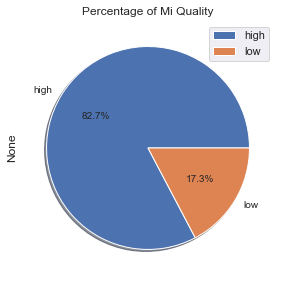

In [295]:
#Plotting a pie chart for mi quality
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
quality_group.plot(kind='pie',y = 'total_arrests', ax=ax1, autopct='%1.1f%%', shadow=True, labels=df['mi_quality'].unique(), legend = True, fontsize=10)
plt.title('Percentage of Mi Quality')
plt.show()


In [296]:
#Lisitng top 5 conversation topics along with their count
df_tp = transcript_group.apply(lambda x: x['topic'].unique())
topic_group = df_tp.value_counts().head(5)
print(topic_group)

[reducing alcohol consumption]                     23
[smoking cessation]                                10
[smoking cessation ]                                9
[taking medicine / following medical procedure]     8
[reducing recidivism]                               7
dtype: int64


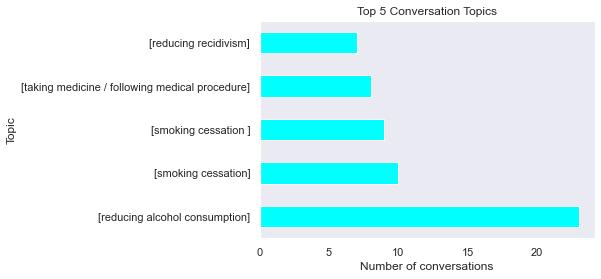

In [297]:
#Plotting bar chart for the above data
topic_group.plot(kind='barh',color='cyan')
plt.xlabel('Number of conversations')
plt.ylabel('Topic')
plt.title('Top 5 Conversation Topics')
plt.grid()
plt.show()

In [298]:
#Listing the types of therapist behaviour and their count
therapist_group = df['main_therapist_behaviour'].value_counts()
print(therapist_group)


other              1586
question           1386
reflection         1296
therapist_input     614
Name: main_therapist_behaviour, dtype: int64


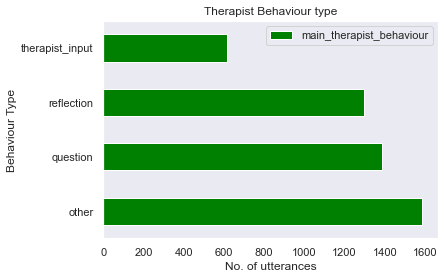

In [299]:
#Plotting a bar graph
therapist_group.plot(kind='barh',color='green')
plt.xlabel('No. of utterances')
plt.ylabel('Behaviour Type')
plt.title('Therapist Behaviour type')
plt.grid()
plt.legend()
plt.show()

In [300]:
#Listing the types of client behaviour and their count
client_group = df['client_talk_type'].value_counts()
print(client_group)


neutral    3102
change     1174
sustain     541
Name: client_talk_type, dtype: int64


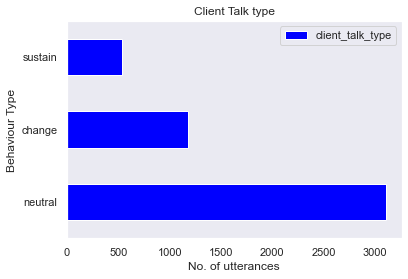

In [301]:
#Plotting a bar graph
client_group.plot(kind='barh',color='blue')
plt.xlabel('No. of utterances')
plt.ylabel('Behaviour Type')
plt.title('Client Talk type')
plt.grid()
plt.legend()
plt.show()


SUMMARISATION

In [302]:
#Text Summarisation using LexRank Method
from lexrank.algorithms.summarizer import LexRank 
from lexrank.mappings.stopwords import STOPWORDS

question
Summary : ["Yeah, good. That sounds good. Mike, has there even been, if any, um, a time in your life when you've thought about, um, not drinking at all?", "Yeah, so then it's, um, right now, uh, tell me a little bit about, um, right now at this point in your life why it's so important to quit."]
Scores cont : [0.28317394 2.19914029 0.76589422 ... 1.         0.41546696 0.39181652]
therapist_input
Summary : ["Okay, so, yeah, just another reason why you probably need to just quit then. Um, okay, yeah. I-- Okay, so, like I said, I'm gonna right down here that you've decided to quit and, um, uh, you know, I'm gonna be meeting with you again probably in the next semester sometime, so we can kinda check-in and-and make sure that, you know, that's still going well-", "Yeah, I appreciate it. So, um, uh, your mom had given me a call and said that, um, um, there were some problems with kids kinda given you problems at school and being mean and things like that, and, uh, that's a hurtful 

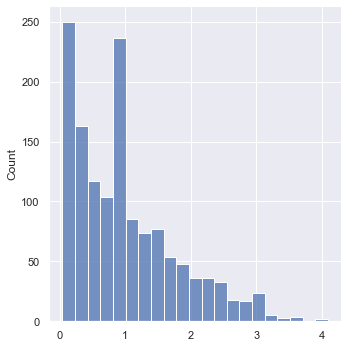

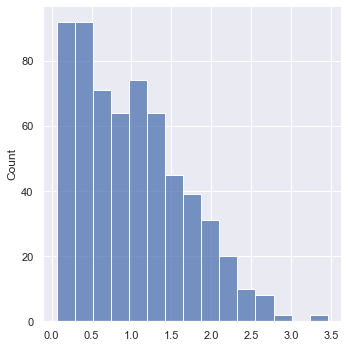

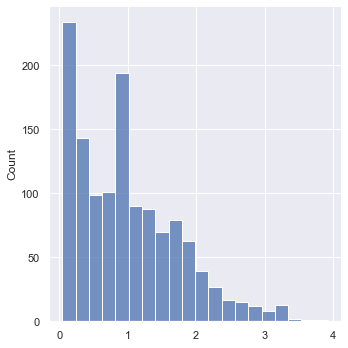

In [303]:
#Filtering the utterance text for each type of therapist behaviour and feeding it to the LexRank summarizer to get summary score
behaviour_group = df['main_therapist_behaviour'].dropna().unique()

for behaviour in behaviour_group:
    print(behaviour)
    filt = df['main_therapist_behaviour'] == behaviour
    text = df.loc[filt]['utterance_text']
    documents = text.tolist()
    try:
        lxr = LexRank(documents, stopwords=STOPWORDS['en'])
        summary = lxr.get_summary(documents, summary_size=2, threshold=.1)
        print("Summary :",summary)
        scores_cont = lxr.rank_sentences(documents,threshold=None,fast_power_method=False,)
        print("Scores cont :",scores_cont)
        sns.set(color_codes=True)
        x = scores_cont
        #PLotting graph for all types of therapist behaviour
        sns.displot(x).set_title("{}").format(behaviour)
    except:
        pass

    

BINARY CLASSIFIER

In [304]:
#Importing CSV data for binary classification
#The utterance text is the data and interlocutor is the label. 
df_clf = pd.read_csv('dataset.csv', usecols=['interlocutor','utterance_text'])
df_clf.head()

,interlocutor,utterance_text
0,therapist,Thanks for filling it out. We give this form t...
1,client,Sure.
2,therapist,"So, let's see. It looks that you put-- You dri..."
3,client,Mm-hmm.
4,therapist,-and you usually have three to four drinks whe...


In [305]:
#Data is converted to list and splitted into 80%, 20% train, test data
train_x = df_clf['utterance_text'].tolist()
label_y = df_clf['interlocutor'].tolist()
train_dataset, test_dataset, train_labels, test_labels = sklearn.model_selection.train_test_split(train_x,label_y,test_size=0.2)

In [306]:
print("Train Dataset length: ",len(train_dataset))
print("Class Distribution Counter: ", str(Counter(train_labels)))
print("Test Dataset length: ",len(test_dataset))
print("Class Distribution Counter: ", str(Counter(test_labels)))

Train Dataset length:  7759
Class Distribution Counter:  Counter({'therapist': 3932, 'client': 3827})
Test Dataset length:  1940
Class Distribution Counter:  Counter({'client': 990, 'therapist': 950})


In [307]:
#Lemmatizer class to get the correct words
class LemmaTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]

tokenizer=LemmaTokenizer()

In [308]:
#Encoding the train labels to feed into the network
label_encoder = preprocessing.LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
print(train_labels)

[1 0 0 ... 1 1 1]


In [309]:
#Using Tfidf Vectorizer for vectorizing the data.
#Bi gram approach is used to consider the relation between words
#Stop words is used to remove unimportant words
vectorizer = TfidfVectorizer(binary=True, ngram_range=(1,2),min_df=3, norm='l2',stop_words='english',tokenizer=tokenizer)
train_x_vectors = vectorizer.fit_transform(train_dataset)
print(vectorizer.get_feature_names_out())

/Users/stefanrodrigues/yes/envs/spacy/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:394: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


['$' '$ 150' '%' ... '’ s' '’ t' '’ ve']


In [310]:
#Linear svm classifier is used to train the model
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vectors, train_labels)

SVC(kernel='linear')

In [311]:
#Test data is vectorized for prediction
test_x = vectorizer.transform(test_dataset)
predicted_out = clf_svm.predict(test_x)
#Predicted labels are decoded
predicted_labels = label_encoder.inverse_transform(predicted_out)
print(predicted_labels)

['therapist' 'client' 'therapist' ... 'client' 'therapist' 'client']


PERFORMANCE METRICS

In [312]:
#calculating accuracy score
accuracy = accuracy_score(test_labels, predicted_labels, normalize=True, sample_weight=None)*100
print("Accuracy score: {:.4f}".format(accuracy))

Accuracy score: 76.9588


In [313]:
#calculating precision and recall score
pr_sc = precision_score(test_labels, predicted_labels, average='macro')*100
print("Precision Score: {}".format(pr_sc))
rc_sc = recall_score(test_labels, predicted_labels, average='macro')*100
print("Recall Score: {}".format(rc_sc))

Precision Score: 76.94907486663428
Recall Score: 76.94790005316321


In [314]:
#Calculating f1 score as the weighted avergae of precision and recall
f1_sc = 2 * (pr_sc*rc_sc)/(pr_sc+rc_sc)
print("F1 Score: {}".format(f1_sc))

F1 Score: 76.94848745541462


In [315]:
#Creating list for classifier performance metrics
score_list = []
score_list.append(accuracy)
score_list.append(pr_sc)
score_list.append(rc_sc)
score_list.append(f1_sc)
print(score_list)

[76.95876288659794, 76.94907486663428, 76.94790005316321, 76.94848745541462]


CONFUSION MATRIX

[Text(0, 0.5, 'client'), Text(0, 1.5, 'therapist')]

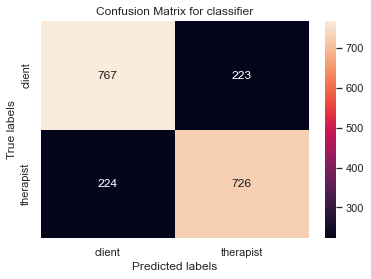

In [316]:
#Plotting confusion matrix for classifier
cm = confusion_matrix(test_labels, predicted_labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for classifier')
ax.xaxis.set_ticklabels(['client', 'therapist'])
ax.yaxis.set_ticklabels(['client', 'therapist'])

Transformer Model

In [317]:
import spacy
import torch

In [318]:
vectors_nlp = spacy.load("en_core_web_md")
#Loading transformer model
trf_model = spacy.load("en_core_web_trf")
trf_model.vocab.vectors = vectors_nlp.vocab.vectors

In [319]:
#preprocessing the train dataset
data_set = [trf_model(data) for data in train_dataset]
train_x_vectors = [x.vector for x in data_set]

#training the model
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vectors, train_labels)

/Users/stefanrodrigues/yes/envs/spacy/lib/python3.9/site-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


SVC(kernel='linear')

In [320]:
#vectorizing the test data
data_set_ts = [trf_model(data) for data in test_dataset]
test_x_vectors = [y.vector for y in data_set_ts]

#prediciting the test dataset
trf_pred_out = clf_svm.predict(test_x_vectors)

/Users/stefanrodrigues/yes/envs/spacy/lib/python3.9/site-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [321]:
#decoding the test labels
trf_pred_labels = label_encoder.inverse_transform(trf_pred_out)
print(trf_pred_labels)

['therapist' 'client' 'therapist' ... 'client' 'therapist' 'client']


In [322]:
#calculating accuracy score
trf_accuracy = accuracy_score(test_labels, trf_pred_labels, normalize=True, sample_weight=None)*100
print("Accuracy score: {:.4f}".format(trf_accuracy))

Accuracy score: 74.5876


In [323]:
#calculating precision and recall score
trf_pr_sc = precision_score(test_labels, trf_pred_labels, average='macro')*100
print("Precision Score: {}".format(trf_pr_sc))
trf_rc_sc = recall_score(test_labels, trf_pred_labels, average='macro')*100
print("Recall Score: {}".format(trf_rc_sc))

Precision Score: 74.76623202043285
Recall Score: 74.48644338118022


In [324]:
#Calculating f1 score as the weighted avergae of precision and recall
trf_f1_sc = 2 * (trf_pr_sc*trf_rc_sc)/(trf_pr_sc+trf_rc_sc)
print("F1 Score: {}".format(trf_f1_sc))

F1 Score: 74.6260754553143


In [325]:
#Creating list for transformer performance metrics
score_list_tr = []
score_list_tr.append(trf_accuracy)
score_list_tr.append(trf_pr_sc)
score_list_tr.append(trf_rc_sc)
score_list_tr.append(trf_f1_sc)
print(score_list_tr)

[74.58762886597938, 74.76623202043285, 74.48644338118022, 74.6260754553143]


[Text(0, 0.5, 'client'), Text(0, 1.5, 'therapist')]

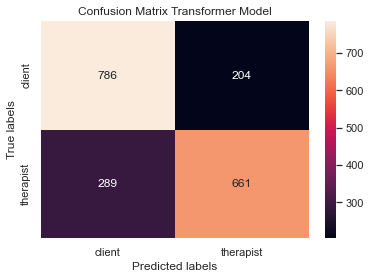

In [326]:
#Plotting confusion matrix for transformer model
cm = confusion_matrix(test_labels, trf_pred_labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Transformer Model')
ax.xaxis.set_ticklabels(['client', 'therapist'])
ax.yaxis.set_ticklabels(['client', 'therapist'])

In [327]:
#Creating the table for comparsion
comaprison_list = pd.DataFrame([score_list, score_list_tr])
my_columns = ["Accuracy(%)", "Precision(%)", "Recall(%)","F1_score(%)"]
comaprison_list.columns = my_columns
comaprison_list.index = ["Binary Classifier", "Pre-Trained Transformer model"]
    

In [328]:
#Comparison of performance between the two models
comaprison_list

,Accuracy(%),Precision(%),Recall(%),F1_score(%)
Binary Classifier,76.958763,76.949075,76.947900,76.948487
Pre-Trained Transformer model,74.587629,74.766232,74.486443,74.626075
